In [196]:
# Import dependencies
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

# Don't need the following probably
import seaborn as sns 
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

import nltk

# Data cleaning and prep

In [197]:
# Read in CSV File
data = pd.read_csv('db/winequality-red.csv', dtype={'Zip': 'str'})
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [198]:
# Investigate the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [199]:
# Shape of the data
data.shape

(1599, 12)

In [200]:
# Check for NaN values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [201]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [202]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [33]:
# Have to raplce lables from 3-8 to 0-5 
# NOTE: Had to replace the labels in two buckets, otherwise the data overlaps and gives an error
# TODO: Refactor the code to Map method 
# first_replaced_data = raw_data.replace({'quality': {3: 0, 4: 1, 5: 2}})
# final_replaced_data = first_replaced_data.replace({'quality': {6: 3, 7: 4, 8: 5}})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2


In [36]:
# Now check to see if our labels are 0-5 
# final_replaced_data["quality"].unique()

array([2, 3, 4, 1, 5, 0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47e98550>,
      dtype=object)

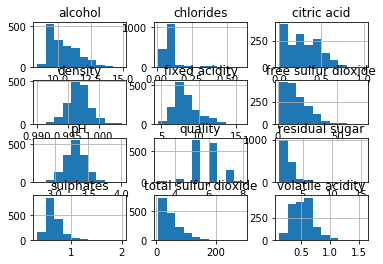

In [190]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a49099b00>,
      dtype=object)

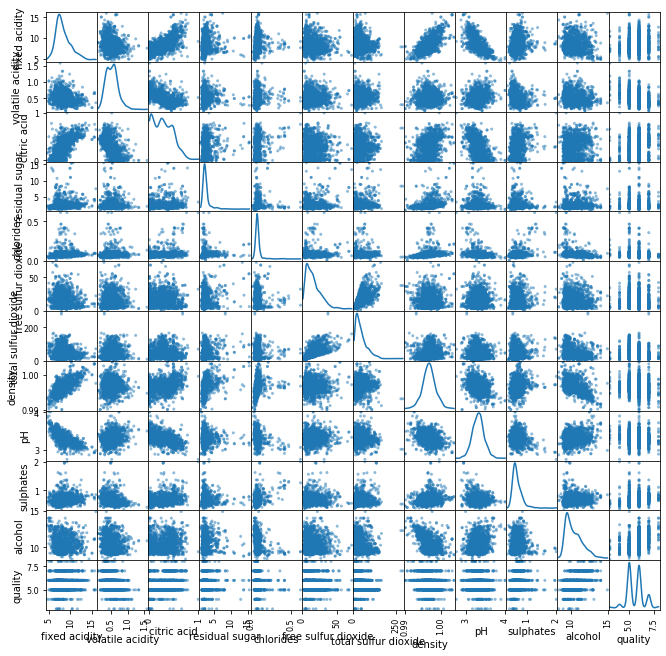

In [191]:
# Check to see if the data is linear or non linear
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.5, figsize=(11, 11), diagonal='kde')

In [203]:
# Dividing labels to three groups instead of 6
quality = data['quality'].values
rating = []

# Place the labels in bins
for num in quality:
    if num >= 7:
        rating.append('2')
    elif num >= 5:
        rating.append('1')
    else:
        rating.append('0')
        
rating = pd.DataFrame(data = rating, columns = ['rating'])
data = pd.concat([data,rating],axis = 1)

# Rename label data in place. 
data.drop(columns='quality',axis = 1,inplace = True)

# Create a train/test split

In [205]:
# Data Preprocessing
X = data.drop("rating", axis=1)
y = data["rating"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [206]:
# Split the data into tarining and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [207]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1131,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5
655,9.7,0.55,0.17,2.9,0.087,20.0,53.0,1.00040,3.14,0.61,9.4
1187,7.0,0.43,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9
362,11.9,0.58,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0
780,7.0,0.57,0.00,2.0,0.190,12.0,45.0,0.99676,3.31,0.60,9.4


# Pre-processing

In [234]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [235]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [236]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [237]:
# Check the shape of y
y_train_categorical.shape

(1199, 3)

# Deep Learning Model 

In [238]:
# Create model and add layers 
deep_model = Sequential()
deep_model.add(Dense(units=200, activation='relu', input_dim=11))
deep_model.add(Dense(units=200, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))

In [239]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [240]:
deep_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 200)               2400      
_________________________________________________________________
dense_36 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 603       
Total params: 43,203
Trainable params: 43,203
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Fit the model
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
1199/1199 - 1s - loss: 0.5944 - acc: 0.8165
Epoch 2/500
1199/1199 - 0s - loss: 0.5434 - acc: 0.8249
Epoch 3/500
1199/1199 - 0s - loss: 0.5297 - acc: 0.8249
Epoch 4/500
1199/1199 - 0s - loss: 0.5257 - acc: 0.8249
Epoch 5/500
1199/1199 - 0s - loss: 0.5113 - acc: 0.8249
Epoch 6/500
1199/1199 - 0s - loss: 0.5027 - acc: 0.8249
Epoch 7/500
1199/1199 - 0s - loss: 0.4999 - acc: 0.8257
Epoch 8/500
1199/1199 - 0s - loss: 0.4905 - acc: 0.8232
Epoch 9/500
1199/1199 - 0s - loss: 0.4804 - acc: 0.8232
Epoch 10/500
1199/1199 - 0s - loss: 0.4751 - acc: 0.8232
Epoch 11/500
1199/1199 - 0s - loss: 0.4671 - acc: 0.8282
Epoch 12/500
1199/1199 - 0s - loss: 0.4643 - acc: 0.8299
Epoch 13/500
1199/1199 - 0s - loss: 0.4599 - acc: 0.8340
Epoch 14/500
1199/1199 - 0s - loss: 0.4545 - acc: 0.8357
Epoch 15/500
1199/1199 - 0s - loss: 0.4550 - acc: 0.8282
Epoch 16/500
1199/1199 - 0s - loss: 0.4519 - acc: 0.8299
Epoch 17/500
1199/1199 - 0s - loss: 0.4572 - acc: 0.8365
Epoch 18/500
1199/1199 - 0s - loss: 0.44

Epoch 145/500
1199/1199 - 0s - loss: 0.3643 - acc: 0.8474
Epoch 146/500
1199/1199 - 0s - loss: 0.3642 - acc: 0.8565
Epoch 147/500
1199/1199 - 0s - loss: 0.3614 - acc: 0.8666
Epoch 148/500
1199/1199 - 0s - loss: 0.3657 - acc: 0.8574
Epoch 149/500
1199/1199 - 0s - loss: 0.3704 - acc: 0.8565
Epoch 150/500
1199/1199 - 0s - loss: 0.3654 - acc: 0.8632
Epoch 151/500
1199/1199 - 0s - loss: 0.3619 - acc: 0.8599
Epoch 152/500
1199/1199 - 0s - loss: 0.3673 - acc: 0.8515
Epoch 153/500
1199/1199 - 0s - loss: 0.3569 - acc: 0.8616
Epoch 154/500
1199/1199 - 0s - loss: 0.3569 - acc: 0.8624
Epoch 155/500
1199/1199 - 0s - loss: 0.3589 - acc: 0.8582
Epoch 156/500
1199/1199 - 0s - loss: 0.3656 - acc: 0.8549
Epoch 157/500
1199/1199 - 0s - loss: 0.3518 - acc: 0.8616
Epoch 158/500
1199/1199 - 0s - loss: 0.3523 - acc: 0.8632
Epoch 159/500
1199/1199 - 0s - loss: 0.3538 - acc: 0.8757
Epoch 160/500
1199/1199 - 0s - loss: 0.3606 - acc: 0.8624
Epoch 161/500
1199/1199 - 0s - loss: 0.3591 - acc: 0.8607
Epoch 162/500


Epoch 287/500
1199/1199 - 0s - loss: 0.2699 - acc: 0.8999
Epoch 288/500
1199/1199 - 0s - loss: 0.2672 - acc: 0.8966
Epoch 289/500
1199/1199 - 0s - loss: 0.2640 - acc: 0.8999
Epoch 290/500
1199/1199 - 0s - loss: 0.2563 - acc: 0.9033
Epoch 291/500
1199/1199 - 0s - loss: 0.2565 - acc: 0.9074
Epoch 292/500
1199/1199 - 0s - loss: 0.2605 - acc: 0.9083
Epoch 293/500
1199/1199 - 0s - loss: 0.2525 - acc: 0.9099
Epoch 294/500
1199/1199 - 0s - loss: 0.2631 - acc: 0.9049
Epoch 295/500
1199/1199 - 0s - loss: 0.2609 - acc: 0.9058
Epoch 296/500
1199/1199 - 0s - loss: 0.2620 - acc: 0.9024
Epoch 297/500
1199/1199 - 0s - loss: 0.2492 - acc: 0.9108
Epoch 298/500
1199/1199 - 0s - loss: 0.2624 - acc: 0.8991
Epoch 299/500
1199/1199 - 0s - loss: 0.2611 - acc: 0.9041
Epoch 300/500
1199/1199 - 0s - loss: 0.2471 - acc: 0.9099
Epoch 301/500
1199/1199 - 0s - loss: 0.2548 - acc: 0.9149
Epoch 302/500
1199/1199 - 0s - loss: 0.2608 - acc: 0.8999
Epoch 303/500
1199/1199 - 0s - loss: 0.2566 - acc: 0.9033
Epoch 304/500


Epoch 429/500
1199/1199 - 0s - loss: 0.1921 - acc: 0.9258
Epoch 430/500
1199/1199 - 0s - loss: 0.1903 - acc: 0.9308
Epoch 431/500
1199/1199 - 0s - loss: 0.1913 - acc: 0.9274
Epoch 432/500
1199/1199 - 0s - loss: 0.1817 - acc: 0.9366
Epoch 433/500
1199/1199 - 0s - loss: 0.1773 - acc: 0.9391
Epoch 434/500
1199/1199 - 0s - loss: 0.1827 - acc: 0.9341
Epoch 435/500
1199/1199 - 0s - loss: 0.1924 - acc: 0.9308
Epoch 436/500
1199/1199 - 0s - loss: 0.1917 - acc: 0.9333
Epoch 437/500
1199/1199 - 0s - loss: 0.2155 - acc: 0.9233
Epoch 438/500
1199/1199 - 0s - loss: 0.2103 - acc: 0.9249
Epoch 439/500
1199/1199 - 0s - loss: 0.2081 - acc: 0.9224
Epoch 440/500
1199/1199 - 0s - loss: 0.1802 - acc: 0.9383
Epoch 441/500
1199/1199 - 0s - loss: 0.1884 - acc: 0.9383
Epoch 442/500
1199/1199 - 0s - loss: 0.1861 - acc: 0.9366
Epoch 443/500
1199/1199 - 0s - loss: 0.1856 - acc: 0.9358
Epoch 444/500
1199/1199 - 0s - loss: 0.1777 - acc: 0.9391
Epoch 445/500
1199/1199 - 0s - loss: 0.1738 - acc: 0.9416
Epoch 446/500


In [242]:
# Make deep model predictions
encoded_predictions = deep_model.predict_classes(X_test_scaled[:10])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test)[:10]}")

Predicted classes: ['1' '1' '1' '1' '1' '2' '1' '1' '1' '1']
Actual Labels: ['1', '1', '1', '1', '2', '2', '1', '0', '1', '0']


In [243]:
# Determine deep model score
dm_score = deep_model.evaluate(X_test_scaled, y_test_categorical)
print(dm_score)
# print(X_test_scaled)

400/400 [==============================] - 0s 314us/sample - loss: 1.0222 - acc: 0.8500
[1.0222204411029816, 0.85]


# Random Forest 

In [140]:
from sklearn.datasets import make_classification

In [141]:
Rand_F = RandomForestClassifier(random_state=42)

In [142]:
Rand_F.fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [143]:
pred_clf_A = Rand_F.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
print(classification_report(y_test, pred_clf_A))
print('accuracy:')
print(accuracy_score(y_test,pred_clf_A))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        13
           2       0.69      0.80      0.74       170
           3       0.66      0.69      0.68       160
           4       0.68      0.46      0.55        50
           5       0.00      0.00      0.00         5

    accuracy                           0.68       400
   macro avg       0.34      0.33      0.33       400
weighted avg       0.64      0.68      0.66       400

accuracy:
0.675


# TESTING

In [153]:
# Divide ;abe;s to three groups instead of 6

data=pd.read_csv('db/winequality-red.csv', dtype={'Zip': 'str'})


quality = data['quality'].values
rating = []

#Convert numerial data to categorical data.  
for num in quality:
    if num>=7:
        rating.append('2')
    elif num<5:
        rating.append('0')
    else:
        rating.append('1')
rating = pd.DataFrame(data=rating, columns=['rating'])
data = pd.concat([data,rating],axis=1)

# Rename label data in place. 
data.drop(columns='quality',axis=1,inplace=True)

In [154]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1


In [169]:
# Data Preprocessing
X_new = data.drop("rating", axis=1)
y_new = data["rating"]
print(X_new.shape, y_new.shape)

(1599, 11) (1599,)


In [170]:
X_new_scaler = MinMaxScaler().fit(X_new_train)

X_new_train_scaled = X_new_scaler.transform(X_new_train)
X_new_test_scaled = X_new_scaler.transform(X_new_test)

NameError: name 'X_new_train' is not defined

In [163]:
label_encoder = LabelEncoder()
label_encoder.fit(y_new_train)
encoded_y_new_train = label_encoder.transform(y_new_train)
encoded_y_new_test = label_encoder.transform(y_new_test)

y_new_train_categorical = to_categorical(encoded_y_new_train)
y_new_test_categorical = to_categorical(encoded_y_new_test)

In [167]:
# Check the shape of y
y_train_categorical.shape

(1199, 6)

In [164]:
# Model Architecture 
new_model = Sequential()
new_model.add(Dense(units=200, activation='relu', input_dim=11))
new_model.add(Dense(units=200, activation='relu'))
new_model.add(Dense(units=3, activation='softmax'))

In [165]:
# Compile and fit the model
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
# Fit the model
new_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

ValueError: A target array with shape (1199, 6) was passed for an output of shape (None, 3) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
# NOTE to convert into percentages 
##############################################################################
# Obtain Accuracy Scores for the test set
##############################################################################
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('GaussianNB:',accuracy_score(y_test, Gaussian_pred)*100,'%')
print('SVC:',accuracy_score(y_test, svc_pred)*100,'%')
print('XGB:',accuracy_score(y_test, xgb_pred)*100,'%')